# KPIs_criptos.ipynb

## Importar librerías

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Función para calcular indicadores técnicos

In [66]:

def calcular_indicadores(df):
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))
    
    ema12 = df['Close'].ewm(span=12, adjust=False).mean()
    ema26 = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = ema12 - ema26
    df['Signal_MACD'] = df['MACD'].ewm(span=9, adjust=False).mean()
    
    ma20 = df['Close'].rolling(window=20).mean()
    std20 = df['Close'].rolling(window=20).std()
    df['Bollinger_Upper'] = ma20 + 2*std20
    df['Bollinger_Lower'] = ma20 - 2*std20
    
    low14 = df['Low'].rolling(window=14).min()
    high14 = df['High'].rolling(window=14).max()
    df['Stochastic'] = 100 * (df['Close'] - low14) / (high14 - low14)
    
    high = df['High']
    low = df['Low']
    close = df['Close']
    plus_dm = high.diff()
    minus_dm = low.diff().abs()
    plus_dm[plus_dm < 0] = 0
    minus_dm[minus_dm < 0] = 0
    tr1 = pd.DataFrame(high - low)
    tr2 = pd.DataFrame(abs(high - close.shift()))
    tr3 = pd.DataFrame(abs(low - close.shift()))
    tr = pd.concat([tr1, tr2, tr3], axis=1).max(axis=1)
    atr = tr.rolling(window=14).mean()
    plus_di = 100 * (plus_dm.rolling(window=14).mean() / atr)
    minus_di = 100 * (minus_dm.rolling(window=14).mean() / atr)
    dx = (abs(plus_di - minus_di) / (plus_di + minus_di)) * 100
    df['ADX'] = dx.rolling(window=14).mean()
    
    df['Media Móvil 30'] = df['Close'].rolling(window=30).mean()
    
    return df

# Cargar datos

In [67]:
ruta = '../static/data/procesados.csv'  
df = pd.read_csv(ruta, parse_dates=['Date'], index_col='Date')

# Limpiar posibles zonas horarias

In [68]:
if df.index.tz is not None:
    df.index = df.index.tz_localize(None)

# Ordenar índice por fecha

In [69]:
df = df.sort_index()

# Calcular indicadores

In [70]:
df = calcular_indicadores(df)

# Filtrar últimos 60 días

In [71]:
fecha_max = df.index.max()
fecha_min = fecha_max - pd.Timedelta(days=60)
df = df.loc[fecha_min:fecha_max]

print(f"Datos desde {df.index.min()} hasta {df.index.max()}")


Datos desde 2025-03-25 00:00:00 hasta 2025-05-24 00:00:00


# Visualizar KPIs básicos con gráficos

In [72]:
plt.figure(figsize=(14, 10))

<Figure size 1400x1000 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

# Precio de cierre y media móvil

Filtrando datos desde 2025-03-25 00:00:00 hasta 2025-05-24 00:00:00
Número de filas: 61


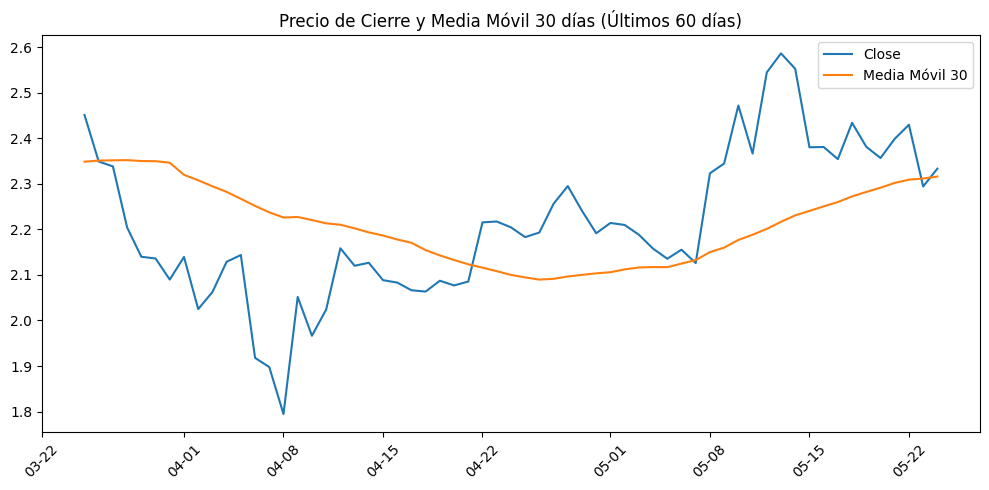

In [73]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fecha_max = df.index.max()
fecha_min = fecha_max - pd.Timedelta(days=60)
df_filtrado = df.loc[fecha_min:fecha_max]

print(f"Filtrando datos desde {fecha_min} hasta {fecha_max}")
print(f"Número de filas: {len(df_filtrado)}")

if len(df_filtrado) == 0:
    print("No hay datos en el rango seleccionado.")
else:
    plt.figure(figsize=(10, 5))
    plt.plot(df_filtrado.index, df_filtrado['Close'], label='Close')
    plt.plot(df_filtrado.index, df_filtrado['Media Móvil 30'], label='Media Móvil 30')
    plt.title('Precio de Cierre y Media Móvil 30 días (Últimos 60 días)')
    plt.legend()

    ax = plt.gca()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()



# RSI

(array([20169., 20179., 20186., 20193., 20200., 20209., 20216., 20223.,
        20230.]),
 [Text(20169.0, 0, '03-22'),
  Text(20179.0, 0, '04-01'),
  Text(20186.0, 0, '04-08'),
  Text(20193.0, 0, '04-15'),
  Text(20200.0, 0, '04-22'),
  Text(20209.0, 0, '05-01'),
  Text(20216.0, 0, '05-08'),
  Text(20223.0, 0, '05-15'),
  Text(20230.0, 0, '05-22')])

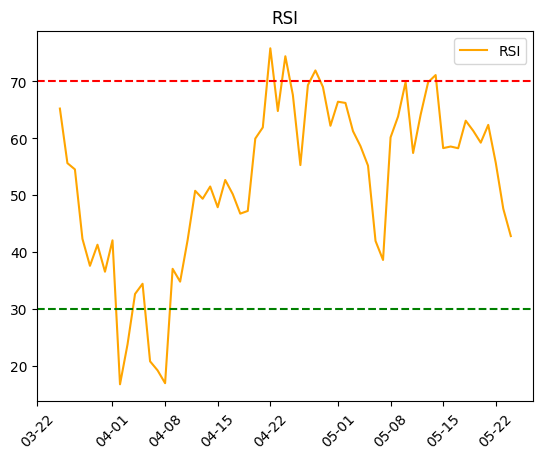

In [74]:
import matplotlib.dates as mdates

plt.subplot(1, 1, 1)
plt.plot(df_filtrado.index, df_filtrado['RSI'], label='RSI', color='orange')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('RSI')
plt.legend()

ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xticks(rotation=45)


# MACD y señal

(array([20169., 20179., 20186., 20193., 20200., 20209., 20216., 20223.,
        20230.]),
 [Text(20169.0, 0, '03-22'),
  Text(20179.0, 0, '04-01'),
  Text(20186.0, 0, '04-08'),
  Text(20193.0, 0, '04-15'),
  Text(20200.0, 0, '04-22'),
  Text(20209.0, 0, '05-01'),
  Text(20216.0, 0, '05-08'),
  Text(20223.0, 0, '05-15'),
  Text(20230.0, 0, '05-22')])

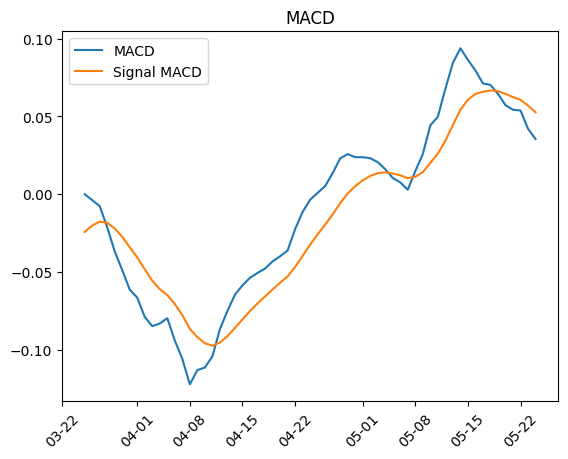

In [75]:
import matplotlib.dates as mdates

plt.subplot(1, 1, 1)
plt.plot(df_filtrado.index, df_filtrado['MACD'], label='MACD')
plt.plot(df_filtrado.index, df_filtrado['Signal_MACD'], label='Signal MACD')
plt.title('MACD')
plt.legend()

ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xticks(rotation=45)

# Bandas de Bollinger

(array([20169., 20179., 20186., 20193., 20200., 20209., 20216., 20223.,
        20230.]),
 [Text(20169.0, 0, '03-22'),
  Text(20179.0, 0, '04-01'),
  Text(20186.0, 0, '04-08'),
  Text(20193.0, 0, '04-15'),
  Text(20200.0, 0, '04-22'),
  Text(20209.0, 0, '05-01'),
  Text(20216.0, 0, '05-08'),
  Text(20223.0, 0, '05-15'),
  Text(20230.0, 0, '05-22')])

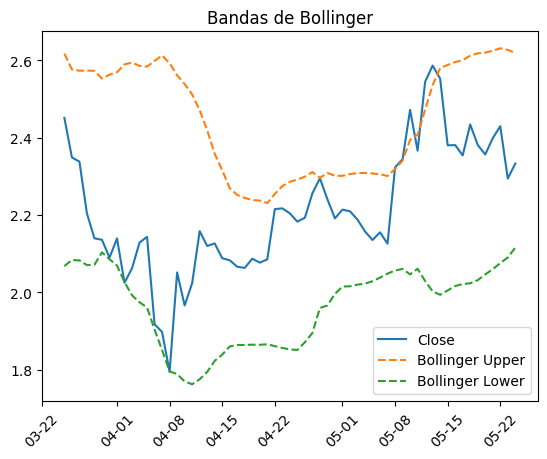

In [76]:
plt.subplot(1, 1, 1)
plt.plot(df_filtrado.index, df_filtrado['Close'], label='Close')
plt.plot(df_filtrado.index, df_filtrado['Bollinger_Upper'], label='Bollinger Upper', linestyle='--')
plt.plot(df_filtrado.index, df_filtrado['Bollinger_Lower'], label='Bollinger Lower', linestyle='--')
plt.title('Bandas de Bollinger')
plt.legend()

ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xticks(rotation=45)

# ADX

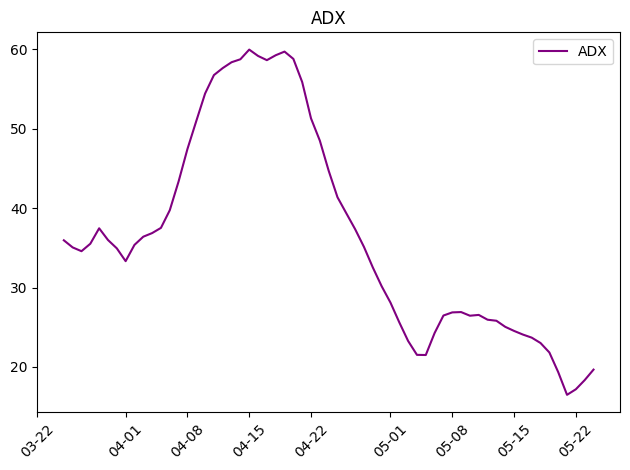

In [77]:
import matplotlib.dates as mdates

plt.subplot(1, 1, 1)
plt.plot(df_filtrado.index, df_filtrado['ADX'], label='ADX', color='purple')
plt.title('ADX')
plt.legend()

ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()